# Import libraries 

In [ ]:
pip install fasttext

In [ ]:
import fasttext
import fasttext.util
import fasttext.util

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/IR\ group2/

Load the sent2vec Binary file

# Read all the prior cases


In [ ]:
folders = [x[0] for x in os.walk(str(os.getcwd())+'\\'+'AILA'+'\\')]
folders[0] = folders[0][:len(folders[0])-1]

lpath, dirs, files = next(os.walk(folders[1]))
dataset = []
numbers=[]

for j in range(len(files)):
        numbers.append(str(j)+"      "+files[j])
        dataset.append((folders[1] +"\\"+ str(files[j])))

In [ ]:
N = len (dataset)

In [ ]:
dataset.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])

In [ ]:
querypath=folders[0]+"\\"+str("Query_doc.txt")

In [ ]:
# doc=[]
# for i in dataset[:N]:
#     file = open(i, 'r', encoding="utf8", errors='ignore')
#     text = file.read()
#     doc.append(ft.get_word_vector(text))

In [ ]:
queries=[]
qrs=[]
file = open(querypath, 'r', encoding="utf8", errors='ignore')
queries = file.read().split('AILA_Q')
count=0
for i in queries[:len(queries)]:
    if(count>0):
        qrs.append(queries[count][3:])
    count=count+1

In [ ]:
# query_vec=[]
# for i in qrs[:len(qrs)]:
#     query_vec.append(ft.get_word_vector(i))

# Sent2vec Implementation


In [ ]:
ft = fasttext.load_model('sent2vec.bin')

datalist.txt contains a list of list of 2914 documents

In [ ]:
import pickle
with open('datalist.txt', "rb") as fp:
    dataset=pickle.load(fp)

data.txt contains a list of list of 2914 documents splitted into list of paragraphs.

In [ ]:
 import pickle
 with open('data.txt', "rb") as fp:
     doc=pickle.load(fp)

cosindering the splitted documents and doc[0][0] represents the first sentence of document 0

Calculating the embeddings for every sentence/passage in the document

In [ ]:
# passage_embedding_corpus=[]
# for i in range(len(doc)):
#   passage_embedding_doc=[]
#   for j in range(len(doc[i])):
#     passage_embedding = ft.get_word_vector(doc[i][j])
#     passage_embedding_doc.append(passage_embedding)
#   passage_embedding_corpus.append(passage_embedding_doc)
#   print(i)

In [ ]:
doc=[]
for i in dataset:
    doc.append(ft.get_word_vector(i))

Calculating Embeddings for every query 

In [ ]:
import pickle
with open('querylist.txt', "rb") as fp:
    qrs=pickle.load(fp)

In [ ]:
query_vec=[]
for i in qrs:
    query_vec.append(ft.get_word_vector(i))

Code to calculate cosine similarity between every query and sentence of document and taking the mean of cosine similarity score as cosine similarity score of the document

In [ ]:
# import numpy as np
# from scipy import spatial
# similarityarray=np.zeros(shape=(2914,50))
# similaritydoc=0
# for k in range(len(query_vec)):
#   for i in range(len(passage_embedding_corpus)):
#     for j in range(len(passage_embedding_corpus[i])):
#       similarity=1 - spatial.distance.cosine(passage_embedding_corpus[i][j],query_vec[k])
#       similaritydoc=similaritydoc+similarity
#     similaritydoc=similaritydoc/len(passage_embedding_corpus[i])
#     similarityarray[i][k]=np.array(similaritydoc)
#     similaritydoc=0
#   print(k)

Code to calculate cosine similarity between every query and sentence of document and taking the max of cosine similarity score as cosine similarity score of the document

In [ ]:
# import numpy as np
# from scipy import spatial
# similarityarray=np.zeros(shape=(2914,50))
# similaritydoc=0
# for k in range(len(query_vec)):
#   for i in range(len(passage_embedding_corpus)):
#     for j in range(len(passage_embedding_corpus[i])):
#       similarity=1 - spatial.distance.cosine(query_vec[k], passage_embedding_corpus[i][j])
#       if(similarity>similaritydoc):
#         similaritydoc=similarity
#     similarityarray[i][k]=np.array(similaritydoc)
#     similaritydoc=0
#   print(k)

This function from sklearn calculates the pairwise similarity of all queries and document vectors, and returns a cosine similarity matrix

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cs=cosine_similarity(doc, query_vec)

In [ ]:
import numpy as np

cosine=np.argmax(cs, axis=-1)
print(cosine)
print(cosine.shape)

code to store the cosine similarity score matrix in drive


In [ ]:
# import pickle
# with open("sent2vecnewsim.pkl", "wb") as fp:
#   pickle.dump(similarityarray,fp)

In [ ]:

# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
# define data
cs
# save to csv file
savetxt('cosinesim.csv', cs, delimiter=',')


# Load Cosine Similarity Score

In [ ]:
import pandas as pd

cs=pd.read_csv('cosinesim.csv', sep=',',header=None)
cs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.899536,0.934053,0.927393,0.910722,0.929413,0.882948,0.831177,0.891862,0.910860,0.917236,0.951993,0.852611,0.938076,0.758308,0.918187,0.845779,0.900570,0.844823,0.922481,0.926208,0.943454,0.937815,0.896638,0.890384,0.919636,0.949823,0.898551,0.874030,0.949202,0.899497,0.921529,0.881970,0.894694,0.952119,0.930598,0.923459,0.930965,0.908157,0.926147,0.901759,0.918870,0.815893,0.899669,0.924884,0.875543,0.873771,0.945708,0.847804,0.880913,0.927045
1,0.928048,0.939053,0.922934,0.886512,0.943729,0.898460,0.835647,0.895595,0.935780,0.930633,0.953078,0.836696,0.939704,0.791150,0.951315,0.905529,0.897293,0.903268,0.946095,0.933787,0.935504,0.946442,0.887179,0.938366,0.923274,0.953213,0.914187,0.888630,0.950295,0.941237,0.923961,0.940154,0.837035,0.949915,0.962618,0.898127,0.954854,0.897941,0.931160,0.925427,0.932167,0.839339,0.874339,0.946175,0.909121,0.924752,0.964001,0.850375,0.903821,0.931112
2,0.952008,0.930502,0.927523,0.915896,0.948400,0.909850,0.867490,0.917776,0.926624,0.914944,0.952724,0.887478,0.943786,0.799947,0.928152,0.874132,0.914615,0.891024,0.942141,0.932855,0.938852,0.951848,0.899633,0.907815,0.902718,0.955651,0.935361,0.913688,0.956291,0.920423,0.915119,0.892566,0.881234,0.961625,0.918215,0.917556,0.939068,0.910679,0.941458,0.944934,0.909495,0.859569,0.889891,0.944135,0.859385,0.879469,0.962283,0.882548,0.841694,0.912861
3,0.943721,0.953146,0.943316,0.912948,0.960376,0.908552,0.845641,0.927565,0.947754,0.922574,0.975815,0.857918,0.950885,0.793957,0.948120,0.899823,0.902308,0.899024,0.960910,0.948911,0.961977,0.962101,0.914364,0.937837,0.933497,0.970106,0.920377,0.910232,0.970205,0.949611,0.940528,0.928096,0.863673,0.966072,0.958388,0.916627,0.962227,0.920203,0.955679,0.944321,0.953704,0.845976,0.893661,0.956269,0.899349,0.924333,0.977169,0.869522,0.881763,0.943912
4,0.913118,0.916153,0.907654,0.872802,0.921859,0.874878,0.760019,0.886883,0.937691,0.891875,0.948626,0.745231,0.902213,0.731798,0.950428,0.932920,0.828719,0.890030,0.938015,0.927143,0.923937,0.927514,0.873215,0.957790,0.944164,0.924454,0.851644,0.861518,0.935759,0.930687,0.910476,0.940923,0.805407,0.911495,0.961963,0.860105,0.932339,0.882167,0.907715,0.885514,0.947680,0.795920,0.868191,0.919265,0.935303,0.933653,0.947588,0.808308,0.907184,0.908424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,0.904922,0.922562,0.887044,0.846171,0.918449,0.922767,0.820280,0.896793,0.901076,0.924269,0.919211,0.840278,0.930283,0.778840,0.931632,0.907860,0.853504,0.871963,0.909308,0.911318,0.924211,0.929487,0.845968,0.899105,0.879214,0.920078,0.885628,0.850812,0.922454,0.908419,0.901160,0.907336,0.827776,0.916645,0.952064,0.861849,0.949090,0.855733,0.918511,0.892383,0.907783,0.804053,0.846558,0.930780,0.898770,0.906384,0.929850,0.806776,0.864152,0.912771
2910,0.941961,0.935615,0.950560,0.889130,0.972737,0.902151,0.842135,0.917773,0.960829,0.905692,0.953564,0.811547,0.932749,0.792354,0.949857,0.914343,0.853039,0.879104,0.969333,0.964184,0.945266,0.967026,0.865813,0.931333,0.931839,0.949916,0.886144,0.927689,0.962756,0.933581,0.903046,0.927191,0.851471,0.935486,0.953968,0.895120,0.969238,0.910532,0.947495,0.912534,0.960190,0.813781,0.869953,0.930805,0.931717,0.922610,0.968929,0.854804,0.853866,0.924514
2911,0.949428,0.932513,0.921322,0.912007,0.946677,0.891359,0.825767,0.921208,0.946813,0.923066,0.964736,0.844056,0.932499,0.772832,0.935830,0.905900,0.907795,0.932723,0.955375,0.928641,0.935550,0.960972,0.912445,0.937307,0.920935,0.954040,0.924673,0.920868,0.955536,0.950478,0.927092,0.933489,0.857741,0.960181,0.937671,0.906717,0.942589,0.914161,0.934400,0.933856,0.920915,0.857673,0.913162,0.946102,0.876554,0.913774,0.968025,0.900513,0.879329,0.921015
2912,0.919508,0.922154,0.92275

# Geting the labels of relevant documents (Hash Table)


In [ ]:
list1=[['AILA_Q1', 'C14'], ['AILA_Q1', 'C9'], ['AILA_Q2', 'C27'], ['AILA_Q2', 'C22'], ['AILA_Q3', 'C1'], ['AILA_Q4', 'C182'], ['AILA_Q5', 'C54'], ['AILA_Q5', 'C36'], ['AILA_Q5', 'C155'], ['AILA_Q5', 'C144'], ['AILA_Q5', 'C121'], ['AILA_Q6', 'C152'], ['AILA_Q6', 'C26'], ['AILA_Q6', 'C19'], ['AILA_Q6', 'C99'], ['AILA_Q7', 'C130'], ['AILA_Q8', 'C32'], ['AILA_Q8', 'C125'], ['AILA_Q8', 'C60'], ['AILA_Q9', 'C42'], ['AILA_Q9', 'C90'], ['AILA_Q10', 'C185'], ['AILA_Q10', 'C180'], ['AILA_Q10', 'C86'], ['AILA_Q11', 'C131'], ['AILA_Q11', 'C132'], ['AILA_Q12', 'C8'], ['AILA_Q13', 'C102'], ['AILA_Q13', 'C120'], ['AILA_Q13', 'C40'], ['AILA_Q14', 'C46'], ['AILA_Q15', 'C185'], ['AILA_Q16', 'C166'], ['AILA_Q16', 'C50'], ['AILA_Q17', 'C67'], ['AILA_Q17', 'C23'], ['AILA_Q17', 'C145'], ['AILA_Q18', 'C188'], ['AILA_Q19', 'C63'], ['AILA_Q19', 'C89'], ['AILA_Q19', 'C77'], ['AILA_Q19', 'C142'], ['AILA_Q20', 'C134'], ['AILA_Q20', 'C168'], ['AILA_Q21', 'C48'], ['AILA_Q21', 'C28'], ['AILA_Q21', 'C114'], ['AILA_Q21', 'C113'], ['AILA_Q22', 'C11'], ['AILA_Q22', 'C118'], ['AILA_Q23', 'C88'], ['AILA_Q23', 'C10'], ['AILA_Q24', 'C171'], ['AILA_Q25', 'C29'], ['AILA_Q25', 'C15'], ['AILA_Q25', 'C41'], ['AILA_Q25', 'C105'], ['AILA_Q25', 'C17'], ['AILA_Q25', 'C84'], ['AILA_Q26', 'C116'], ['AILA_Q26', 'C115'], ['AILA_Q26', 'C44'], ['AILA_Q26', 'C183'], ['AILA_Q26', 'C179'], ['AILA_Q26', 'C108'], ['AILA_Q26', 'C133'], ['AILA_Q26', 'C87'], ['AILA_Q27', 'C91'], ['AILA_Q27', 'C73'], ['AILA_Q27', 'C136'], ['AILA_Q27', 'C175'], ['AILA_Q27', 'C161'], ['AILA_Q28', 'C71'], ['AILA_Q28', 'C178'], ['AILA_Q29', 'C66'], ['AILA_Q29', 'C6'], ['AILA_Q29', 'C127'], ['AILA_Q29', 'C159'], ['AILA_Q29', 'C173'], ['AILA_Q29', 'C24'], ['AILA_Q29', 'C63'], ['AILA_Q29', 'C176'], ['AILA_Q29', 'C156'], ['AILA_Q29', 'C62'], ['AILA_Q29', 'C153'], ['AILA_Q29', 'C74'], ['AILA_Q29', 'C163'], ['AILA_Q29', 'C124'], ['AILA_Q29', 'C169'], ['AILA_Q29', 'C68'], ['AILA_Q29', 'C138'], ['AILA_Q29', 'C100'], ['AILA_Q29', 'C34'], ['AILA_Q29', 'C140'], ['AILA_Q29', 'C4'], ['AILA_Q29', 'C39'], ['AILA_Q30', 'C148'], ['AILA_Q30', 'C80'], ['AILA_Q30', 'C137'], ['AILA_Q30', 'C97'], ['AILA_Q30', 'C123'], ['AILA_Q30', 'C107'], ['AILA_Q30', 'C167'], ['AILA_Q30', 'C83'], ['AILA_Q30', 'C154'], ['AILA_Q30', 'C56'], ['AILA_Q31', 'C93'], ['AILA_Q31', 'C65'], ['AILA_Q32', 'C122'], ['AILA_Q32', 'C164'], ['AILA_Q32', 'C94'], ['AILA_Q33', 'C186'], ['AILA_Q34', 'C72'], ['AILA_Q34', 'C49'], ['AILA_Q34', 'C143'], ['AILA_Q34', 'C69'], ['AILA_Q34', 'C85'], ['AILA_Q34', 'C25'], ['AILA_Q34', 'C126'], ['AILA_Q34', 'C181'], ['AILA_Q34', 'C165'], ['AILA_Q34', 'C33'], ['AILA_Q34', 'C129'], ['AILA_Q34', 'C3'], ['AILA_Q34', 'C13'], ['AILA_Q35', 'C31'], ['AILA_Q35', 'C184'], ['AILA_Q36', 'C57'], ['AILA_Q36', 'C112'], ['AILA_Q36', 'C172'], ['AILA_Q36', 'C160'], ['AILA_Q36', 'C37'], ['AILA_Q36', 'C55'], ['AILA_Q37', 'C18'], ['AILA_Q37', 'C71'], ['AILA_Q37', 'C178'], ['AILA_Q38', 'C149'], ['AILA_Q38', 'C177'], ['AILA_Q38', 'C101'], ['AILA_Q38', 'C110'], ['AILA_Q38', 'C70'], ['AILA_Q39', 'C95'], ['AILA_Q39', 'C16'], ['AILA_Q39', 'C53'], ['AILA_Q39', 'C128'], ['AILA_Q39', 'C169'], ['AILA_Q39', 'C20'], ['AILA_Q39', 'C104'], ['AILA_Q39', 'C146'], ['AILA_Q39', 'C43'], ['AILA_Q39', 'C187'], ['AILA_Q39', 'C119'], ['AILA_Q39', 'C12'], ['AILA_Q40', 'C135'], ['AILA_Q40', 'C111'], ['AILA_Q41', 'C98'], ['AILA_Q41', 'C96'], ['AILA_Q41', 'C35'], ['AILA_Q41', 'C52'], ['AILA_Q41', 'C94'], ['AILA_Q42', 'C103'], ['AILA_Q42', 'C81'], ['AILA_Q42', 'C150'], ['AILA_Q42', 'C2'], ['AILA_Q43', 'C157'], ['AILA_Q43', 'C151'], ['AILA_Q43', 'C158'], ['AILA_Q44', 'C7'], ['AILA_Q44', 'C117'], ['AILA_Q44', 'C109'], ['AILA_Q44', 'C64'], ['AILA_Q44', 'C45'], ['AILA_Q44', 'C61'], ['AILA_Q45', 'C78'], ['AILA_Q45', 'C58'], ['AILA_Q46', 'C5'], ['AILA_Q46', 'C170'], ['AILA_Q46', 'C59'], ['AILA_Q46', 'C75'], ['AILA_Q46', 'C47'], ['AILA_Q46', 'C106'], ['AILA_Q46', 'C79'], ['AILA_Q46', 'C147'], ['AILA_Q46', 'C139'], ['AILA_Q47', 'C171'], ['AILA_Q48', 'C82'], ['AILA_Q48', 'C162'], ['AILA_Q48', 'C141'], ['AILA_Q48', 'C21'], ['AILA_Q49', 'C174'], ['AILA_Q49', 'C38'], ['AILA_Q49', 'C76'], ['AILA_Q49', 'C92'], ['AILA_Q50', 'C27'], ['AILA_Q50', 'C22']] 

In [ ]:
HashTable = [[] for _ in range(50)] 
def Hashing(keyvalue): 
    return keyvalue % len(HashTable) 

def insert(Hashtable, keyvalue, value): 
      
    hash_key = Hashing(keyvalue) 
    Hashtable[hash_key].append(value)

def display_hash(hashTable): 
      
    for i in range(len(hashTable)): 
        print(i, end = " ") 
          
        for j in hashTable[i]: 
            print("-->", end = " ") 
            print(j, end = " ") 
              
        print()



In [ ]:
count=0
for i in list1:
  for j in range(1):
    list0=list(i[0])
    number=int(''.join(list0[6:]))
    list2=list(i[1])
    docnumber=int(''.join(list2[1:]))
    insert(HashTable, number-1, docnumber-1) 
    count=count+1
count

195

In [ ]:
display_hash (HashTable)

0 --> 13 --> 8 
1 --> 26 --> 21 
2 --> 0 
3 --> 181 
4 --> 53 --> 35 --> 154 --> 143 --> 120 
5 --> 151 --> 25 --> 18 --> 98 
6 --> 129 
7 --> 31 --> 124 --> 59 
8 --> 41 --> 89 
9 --> 184 --> 179 --> 85 
10 --> 130 --> 131 
11 --> 7 
12 --> 101 --> 119 --> 39 
13 --> 45 
14 --> 184 
15 --> 165 --> 49 
16 --> 66 --> 22 --> 144 
17 --> 187 
18 --> 62 --> 88 --> 76 --> 141 
19 --> 133 --> 167 
20 --> 47 --> 27 --> 113 --> 112 
21 --> 10 --> 117 
22 --> 87 --> 9 
23 --> 170 
24 --> 28 --> 14 --> 40 --> 104 --> 16 --> 83 
25 --> 115 --> 114 --> 43 --> 182 --> 178 --> 107 --> 132 --> 86 
26 --> 90 --> 72 --> 135 --> 174 --> 160 
27 --> 70 --> 177 
28 --> 65 --> 5 --> 126 --> 158 --> 172 --> 23 --> 62 --> 175 --> 155 --> 61 --> 152 --> 73 --> 162 --> 123 --> 168 --> 67 --> 137 --> 99 --> 33 --> 139 --> 3 --> 38 
29 --> 147 --> 79 --> 136 --> 96 --> 122 --> 106 --> 166 --> 82 --> 153 --> 55 
30 --> 92 --> 64 
31 --> 121 --> 163 --> 93 
32 --> 185 
33 --> 71 --> 48 --> 142 --> 68 --> 84 --> 24

# Results

In [ ]:
Qlist=[]
topn=[]
rel_list1=[]
for i in range(50):
  dict1={}
  for j in range(2914):
        dict1[j]=cs[i][j]
  sorted_x={}
  topq=[]
  print("For Query "+ str(i+1))
  sorted_x = sorted(dict1.items(), key=lambda kv: kv[1],reverse=True)
  for k in range(10):
    topq.append(sorted_x[k])
  topn.append(topq)
  #print(sorted_x)
  print(" First Document Retrieved: "+ str((sorted_x[0][0])+1))
  print(" Second Document Retrieved: "+ str((sorted_x[1][0])+1))
  rel_doc=[]
  for k in range(2914):    
    for z in HashTable[i]:
      if(sorted_x[k][0]==z):
        print("Rank of ground truth document "+str(z+1)+ " is: " +str(k+1))
        rel_list1.append(k+1)
        break
        rel_doc.append(z)
  Qlist.append(rel_doc)
  print("\n")

For Query 1
 First Document Retrieved: 1757
 Second Document Retrieved: 2462
Rank of ground truth document 14 is: 468
Rank of ground truth document 9 is: 1132


For Query 2
 First Document Retrieved: 2115
 Second Document Retrieved: 2237
Rank of ground truth document 22 is: 162
Rank of ground truth document 27 is: 882


For Query 3
 First Document Retrieved: 215
 Second Document Retrieved: 1099
Rank of ground truth document 1 is: 1136


For Query 4
 First Document Retrieved: 913
 Second Document Retrieved: 2708
Rank of ground truth document 182 is: 2792


For Query 5
 First Document Retrieved: 215
 Second Document Retrieved: 1740
Rank of ground truth document 121 is: 648
Rank of ground truth document 144 is: 722
Rank of ground truth document 155 is: 753
Rank of ground truth document 36 is: 1251
Rank of ground truth document 54 is: 1842


For Query 6
 First Document Retrieved: 1520
 Second Document Retrieved: 399
Rank of ground truth document 19 is: 30
Rank of ground truth document 26 i

# Rank vs Relevant document frequency for Sent2vec (Graph)

In [ ]:
counter=[0]*10
for i in rel_list:
  if(i>0 and i<=10):
    counter[0]=counter[0]+1
  elif(i>100 and i<=200):
    counter[1]=counter[1]+1
  elif(i>200 and i<=300):
    counter[2]=counter[2]+1
  elif(i>300 and i<=400):
    counter[3]=counter[3]+1
  elif(i>400 and i<=500):
    counter[4]=counter[4]+1
  elif(i>500 and i<=600):
    counter[5]=counter[5]+1
  elif(i>600 and i<=700):
    counter[6]=counter[6]+1
  elif(i>700 and i<=800):
    counter[7]=counter[7]+1
  elif(i>800 and i<=900):
    counter[8]=counter[8]+1
  elif(i>900 and i<=1000):
    counter[9]=counter[9]+1
counter
bins=[100,200,300,400,500,600,700,800,900,1000]

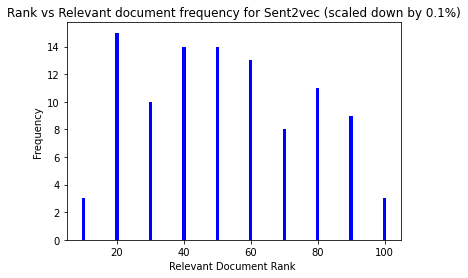

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

data = []
data.append(counter)
# data.append(counter9)
# data.append(counter10)

X = np.arange(10,110,10)
plt.bar(X+0, data[0], color = 'b', width = 1)
# plt.bar(X+1.25, data[1], color = 'r', width = 1)
# plt.bar(X+2.50, data[2], color = 'g', width = 1)
plt.xlabel("Relevant Document Rank ")
plt.ylabel("Frequency")
plt.title("Rank vs Relevant document frequency for Sent2vec (scaled down by 0.1%)")
plt.show()


# Precision@10, Recall@10, Fscore and MRR


In [ ]:
precision=[]
for i in range(50):
  counting=0
  for j in range(10):
    for k in range(len(Qlist[i])):
      #print(topn[i][j][0],Qlist[i][k])
      if(int(topn[i][j][0])==int(Qlist[i][k])):
        print(counting)
        counting=counting+1
  precision.append(counting)

In [ ]:
bins=[]
for i in range(50):
  bins.append(i)

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
a = np.array(precision)
ax.bar(bins,a)
plt.xlabel("Query Number")
plt.ylabel("Precision")
plt.title("Precision @10")
#plt.savefig('figure1.png')
plt.show()

Recall

In [ ]:
recall=[0]*50
for i in range(50):
  recall[i]=precision[i]/len(Qlist[i])
print(recall)
ans=sum(recall)/50
ans

Precision

In [ ]:
for i in range(50): 
  precision[i]=precision[i]/10
print(precision)
ans=sum(precision)/50
ans

fScore

In [ ]:
f=0.0
def fscore(p,r):
  f=(2*p*r)/(p+r)
  return f
Fscore=[0.0]*50
for i in range(50):
  if recall[i]!=0.0:
    Fscore[i]=fscore(precision[i],recall[i])
print(Fscore)
ans=sum(Fscore)/50
ans

In [ ]:
list1=[]
c=0
for i in range(50):
  dict1={}
  c=0
  for j in range(2914):
        dict1[j]=cs[i][j]
  sorted_x={}
  sorted_x = sorted(dict1.items(), key=lambda kv: kv[1],reverse=True)
  print("For Query"+ str(i+1))
  for k in range(2914):
       
    for z in HashTable[i]:
      if(sorted_x[k][0]==z):
        print("Rank of document"+str(z+1))
        print(k+1)
        if(c==0):
          list1.append(k+1)
          c=c+1

In [ ]:
MRR=[0]*50
for i in range(50):
  MRR[i]=1/list1[i]

mrr=(1/50)*sum(MRR)
mrr

# Max similarity for each sentence as document similarity

In [ ]:
Qlist=[]
topn=[]
rel_list=[]
for i in range(50):
  dict1={}
  for j in range(2914):
        dict1[j]=similarityarray.T[i][j]
  sorted_x={}
  topq=[]
  print("For Query "+ str(i+1))
  sorted_x = sorted(dict1.items(), key=lambda kv: kv[1],reverse=True)
  for k in range(10):
    topq.append(sorted_x[k])
  topn.append(topq)
  #print(sorted_x)
  print(" First Document Retrieved: "+ str((sorted_x[0][0])+1))
  print(" Second Document Retrieved: "+ str((sorted_x[1][0])+1))
  rel_doc=[]
  for k in range(2914):    
    for z in HashTable[i]:
      if(sorted_x[k][0]==z):
        print("Rank of ground truth document "+str(z+1)+ " is: " +str(k+1))
        rel_list.append(k+1)
        break
        rel_doc.append(z)
  Qlist.append(rel_doc)
  print("\n")

For Query 1
 First Document Retrieved: 334
 Second Document Retrieved: 1153
Rank of ground truth document 14 is: 811
Rank of ground truth document 9 is: 1366


For Query 2
 First Document Retrieved: 2531
 Second Document Retrieved: 2303
Rank of ground truth document 27 is: 315
Rank of ground truth document 22 is: 401


For Query 3
 First Document Retrieved: 2323
 Second Document Retrieved: 2722
Rank of ground truth document 1 is: 2306


For Query 4
 First Document Retrieved: 2266
 Second Document Retrieved: 467
Rank of ground truth document 182 is: 2723


For Query 5
 First Document Retrieved: 2911
 Second Document Retrieved: 974
Rank of ground truth document 155 is: 344
Rank of ground truth document 54 is: 410
Rank of ground truth document 144 is: 650
Rank of ground truth document 121 is: 1749
Rank of ground truth document 36 is: 1782


For Query 6
 First Document Retrieved: 110
 Second Document Retrieved: 888
Rank of ground truth document 26 is: 412
Rank of ground truth document 152 